In [6]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)


In [7]:
lr_probs

array([[4.02731514e-03, 9.95972685e-01],
       [2.00515726e-03, 9.97994843e-01],
       [9.94701169e-01, 5.29883066e-03],
       [8.47625806e-01, 1.52374194e-01],
       [1.66665036e-03, 9.98333350e-01],
       [4.99938552e-01, 5.00061448e-01],
       [9.80236861e-01, 1.97631392e-02],
       [9.76536616e-01, 2.34633843e-02],
       [1.79993032e-02, 9.82000697e-01],
       [2.93534820e-01, 7.06465180e-01],
       [9.95837980e-01, 4.16201961e-03],
       [2.53553400e-01, 7.46446600e-01],
       [9.92334325e-01, 7.66567488e-03],
       [3.80412811e-02, 9.61958719e-01],
       [6.47854323e-02, 9.35214568e-01],
       [1.92346446e-01, 8.07653554e-01],
       [8.55196114e-01, 1.44803886e-01],
       [4.34676792e-02, 9.56532321e-01],
       [8.43042493e-01, 1.56957507e-01],
       [5.50912415e-02, 9.44908759e-01],
       [1.32992380e-01, 8.67007620e-01],
       [5.89717936e-01, 4.10282064e-01],
       [9.79518433e-01, 2.04815673e-02],
       [3.32906248e-01, 6.67093752e-01],
       [9.957366

In [8]:
lr_probs[:, 1]

array([9.95972685e-01, 9.97994843e-01, 5.29883066e-03, 1.52374194e-01,
       9.98333350e-01, 5.00061448e-01, 1.97631392e-02, 2.34633843e-02,
       9.82000697e-01, 7.06465180e-01, 4.16201961e-03, 7.46446600e-01,
       7.66567488e-03, 9.61958719e-01, 9.35214568e-01, 8.07653554e-01,
       1.44803886e-01, 9.56532321e-01, 1.56957507e-01, 9.44908759e-01,
       8.67007620e-01, 4.10282064e-01, 2.04815673e-02, 6.67093752e-01,
       4.26334713e-03, 9.56694469e-01, 6.92577362e-01, 9.94406759e-01,
       2.49159988e-02, 5.50542684e-01, 7.92214513e-01, 8.15242298e-01,
       8.18291856e-02, 8.23317999e-01, 1.53516867e-02, 7.98798532e-02,
       9.87551937e-01, 9.36923464e-01, 9.86339822e-01, 3.19318661e-01,
       9.82576369e-03, 3.82722802e-02, 9.83635286e-02, 9.83780221e-01,
       6.53737641e-03, 5.29530623e-01, 5.01616608e-01, 9.97760930e-01,
       8.40960809e-03, 1.42082825e-01, 2.21934800e-02, 6.47786780e-01,
       9.79115074e-01, 2.32942383e-01, 5.09205311e-02, 9.03776284e-01,
      

Logistic: f1=0.841 auc=0.898


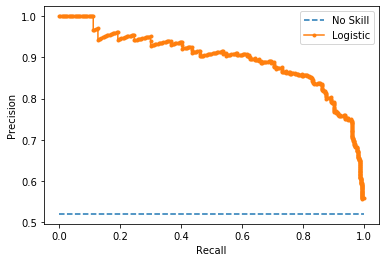

In [9]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()